**Import Libraries Required**

In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob

from PIL import Image
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical


%matplotlib inline

In [110]:
#Retrieve and list out Image folders in downloads

folder_names = [name for name in os.listdir("./downloads")]

folder_names

['Baseball', 'Basketball', 'Football', 'Hockey', 'Soccer']

**Load Images**

In [73]:
#Create X and y variables for training and test images

X = []
y = []

for folder in folder_names:
    try:
        files = glob.glob("downloads/" + folder + "/*")
        for file in files:
            img = Image.open(file)
            img = img.resize((200,200))
            img = np.asarray(img)
            img = np.array(img, dtype = "float32")
            img /= 255
            if img.shape == (200,200,3):
                X.append(img)
                label = folder.split("_")[0]
                y.append(label)
                
    except:
        print("downloads/" + folder + "/" + file)

C:\Users\v_sha\AppData\Local\Programs\Python\Python37\lib\site-packages\PIL\TiffImagePlugin.py:804: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


**Inspect Data**

In [201]:
#Convert into array/Inspect shape of X

X = np.array(X)
y = np.array(y)

X.shape

(3329, 200, 200, 3)

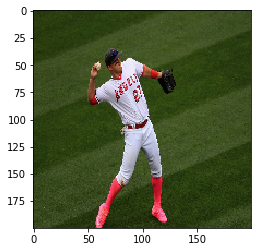

In [77]:
#Inspect an Image

plt.imshow(X[0])

**Prep Data for Model**

In [78]:
#Instantiate train-test-split of data

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [79]:
#Create label(classes) of images

labels = {
    0: "Baseball",
    1: "Basketball",
    2: "Football",
    3: "Hockey",
    4: "Soccer"
}

y_train[0:5]

array(['Hockey', 'Baseball', 'Soccer', 'Football', 'Soccer'], dtype='<U10')

In [80]:
#Instantiate LabelBinarizer and transform Data

lb = LabelBinarizer()

y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

In [81]:
lb.inverse_transform(y_train[[0]])

array(['Hockey'], dtype='<U10')

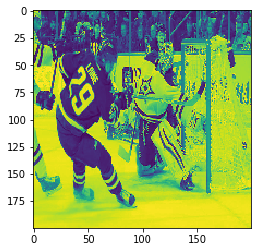

In [82]:
plt.imshow(X_train[0][:, :, 0])

In [83]:
X_train[0].shape

(200, 200, 3)

**Instantiate & Create Model**

In [117]:
#Instantiate Model

cnn_model = Sequential()

# Add a convolutional layer
cnn_model.add(Conv2D(filters = 6,
                     kernel_size = 3,
                     activation = "relu",
                    input_shape=(200, 200, 3)))

# Add a pooling layer
cnn_model.add(MaxPooling2D(pool_size = (3,3)))

# Add a second convolutional layer
cnn_model.add(Conv2D(kernel_size = 3,
                     filters = 16,
                     activation = "relu"))

# Add a second pooling layer
cnn_model.add(MaxPooling2D(pool_size = (3,3)))

# Add a third convolutional layer
cnn_model.add(Conv2D(kernel_size = 3,
                     filters = 26,
                     activation = "relu"))

# Add a third pooling layer
cnn_model.add(MaxPooling2D(pool_size = (3,3)))

# Flatten the 3D array to 1D array
cnn_model.add(Flatten())

# Add in first perceptrons
cnn_model.add(Dense(128, activation = "relu"))

# Add in a Dropout
cnn_model.add(Dropout(0.5))

# Add in second perceptrons
cnn_model.add(Dense(64, activation = "relu"))

# Add in a second Dropout
cnn_model.add(Dropout(0.5))

# Output
cnn_model.add(Dense(len(lb.classes_), activation = "softmax"))

cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 198, 198, 6)       168       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 66, 66, 6)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 16)        880       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 21, 21, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 19, 19, 26)        3770      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 6, 6, 26)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 936)              

In [118]:
cnn_model.compile(loss='categorical_crossentropy',
                 optimizer = 'adam',
                 metrics=['accuracy'])

In [120]:
history = cnn_model.fit(X_train,
                       y_train,
                       batch_size=256,
                       validation_data = (X_test, y_test),
                       epochs = 10,
                       verbose =1)

Train on 2496 samples, validate on 833 samples
Epoch 1/10
2496/2496 [==============================] - 28s 11ms/sample - loss: 1.1772 - acc: 0.5341 - val_loss: 1.0706 - val_acc: 0.5894
Epoch 2/10
2496/2496 [==============================] - 28s 11ms/sample - loss: 1.1117 - acc: 0.5845 - val_loss: 1.0125 - val_acc: 0.6002
Epoch 3/10
2496/2496 [==============================] - 28s 11ms/sample - loss: 1.0608 - acc: 0.5950 - val_loss: 0.9880 - val_acc: 0.6146
Epoch 4/10
2496/2496 [==============================] - 28s 11ms/sample - loss: 1.0158 - acc: 0.6218 - val_loss: 0.9496 - val_acc: 0.6531
Epoch 5/10
2496/2496 [==============================] - 28s 11ms/sample - loss: 0.9805 - acc: 0.6230 - val_loss: 0.9186 - val_acc: 0.6615
Epoch 6/10
2496/2496 [==============================] - 28s 11ms/sample - loss: 0.9461 - acc: 0.6462 - val_loss: 0.9020 - val_acc: 0.6675
Epoch 7/10
2496/2496 [==============================] - 28s 11ms/sample - loss: 0.9264 - acc: 0.6558 - val_loss: 0.9020 - val

**Plot Results**

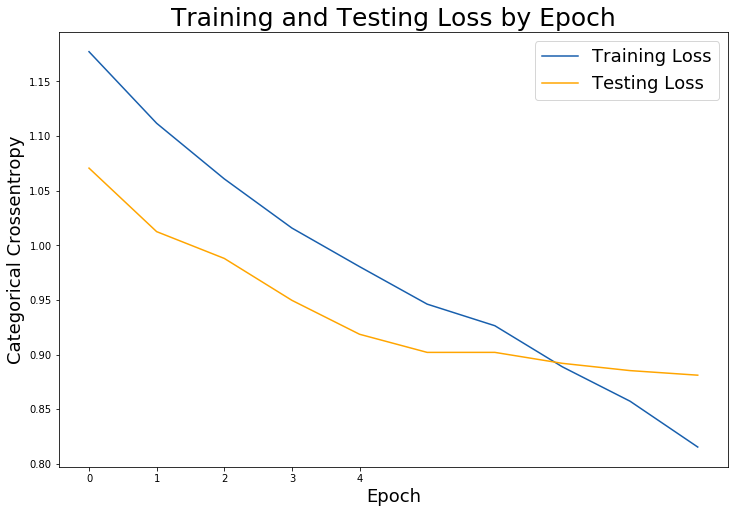

In [121]:
#Plot Training and Testing Loss:

# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks([0, 1, 2, 3, 4])

plt.legend(fontsize = 18);

**Check Final Model Score**

In [122]:
cnn_score = cnn_model.evaluate(X_test, y_test, verbose=1)

cnn_labels = cnn_model.metrics_names

833/833 [==============================] - 4s 5ms/sample - loss: 0.8811 - acc: 0.6759


In [123]:
print(f'CNN {cnn_labels[0]}  : {cnn_score[0]}')
print(f'CNN {cnn_labels[1]}   : {cnn_score[1]}')
print()

CNN loss  : 0.8811053355344061
CNN acc   : 0.6758703589439392



In [124]:
np.set_printoptions(suppress = True)

cnn_model.predict(np.array([X_test[0]]))

array([[0.07499167, 0.03237927, 0.6936199 , 0.0064147 , 0.19259445]],
      dtype=float32)

In [125]:
y_pred_train = [np.argmax(i) for i in (cnn_model.predict(X_train))]

In [126]:
label = {i:name for i, name in enumerate(lb.classes_)}

In [127]:
y_pred_train = [label[i] for i in y_pred_train]

In [128]:
y

array(['Baseball', 'Baseball', 'Baseball', ..., 'Soccer', 'Soccer',
       'Soccer'], dtype='<U10')

In [129]:
lb.classes_[4]

'Soccer'

In [130]:
lb.classes_

array(['Baseball', 'Basketball', 'Football', 'Hockey', 'Soccer'],
      dtype='<U10')

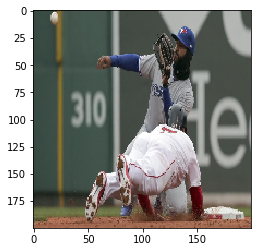

In [131]:
plt.imshow(X_test[4])

In [132]:
y

array(['Baseball', 'Baseball', 'Baseball', ..., 'Soccer', 'Soccer',
       'Soccer'], dtype='<U10')

In [133]:
con_matrix = confusion_matrix(lb.inverse_transform(y_train), y_pred_train)
pd.DataFrame(con_matrix, columns = lb.classes_, index = lb.classes_)

,Baseball,Basketball,Football,Hockey,Soccer
Baseball,473,12,16,22,48
Basketball,72,267,33,63,16
Football,67,40,346,22,103
Hockey,3,15,10,399,2
Soccer,46,8,14,4,395


In [134]:
check = pd.DataFrame({"y_true": lb.inverse_transform(y_train), "y_pred" : y_pred_train})

In [135]:
check.head()

,y_true,y_pred
0,Hockey,Hockey
1,Baseball,Football
2,Soccer,Soccer
3,Football,Football
4,Soccer,Soccer


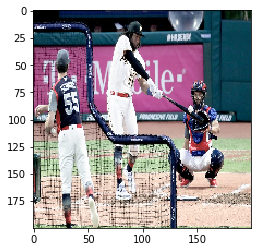

In [137]:
plt.imshow(X_train[1])

In [138]:
cnn_model.save('model.h5')

In [140]:
model = load_model('model.h5')

In [144]:
model.predict(np.array([X_test[0]]))

array([[0.07499167, 0.03237927, 0.6936199 , 0.0064147 , 0.19259445]],
      dtype=float32)

In [175]:
np.array([X_test[0]]).shape

(1, 200, 200, 3)

In [194]:
img = Image.open('C:\\Users\\v_sha\\OneDrive\\Desktop\\traps.jpg')
img = img.resize((200,200))
img = np.asarray(img)
img = np.array(img, dtype = "float32")
img /= 255

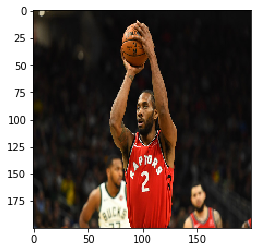

In [198]:
plt.imshow(img)

In [196]:
img.shape

(200, 200, 3)

In [197]:
model.predict(img.reshape(1,200,200,3))

array([[0.1584541 , 0.6740077 , 0.10330806, 0.00869948, 0.05553056]],
      dtype=float32)

In [189]:
label

{0: 'Baseball', 1: 'Basketball', 2: 'Football', 3: 'Hockey', 4: 'Soccer'}

In [204]:
lb.classes_

array(['Baseball', 'Basketball', 'Football', 'Hockey', 'Soccer'],
      dtype='<U10')

In [206]:
class_name = lb.classes_

In [207]:
class_name

array(['Baseball', 'Basketball', 'Football', 'Hockey', 'Soccer'],
      dtype='<U10')

In [208]:
pickle.dump(class_name, open('classes.pkl', 'wb'))

In [209]:
c_name = pickle.load(open('classes.pkl', 'rb'))

In [210]:
c_name

array(['Baseball', 'Basketball', 'Football', 'Hockey', 'Soccer'],
      dtype='<U10')